# <font color='blue'>**Chi squared goodness of fit test** (Критерий согласия)</font> 

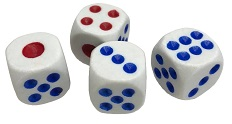

Бросив кубик 120 раз, мы наблюдали следующие значения:

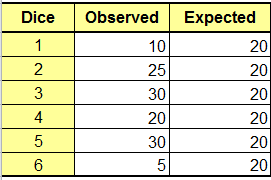

Насколько честный наш игральный кубик?


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# <font color='blue'> 1. Хи-квадрат статистика Пирсона </font>  

Мы рассматриваем мультиномиальное распределение с параметрами $$ n = 120, \qquad p=(p_1, \dots, p_6)$$

Обозначим $$p_{0} = \underbrace{(\frac{1}{6}, \dots \frac{1}{6})}_{6}$$

Тестирование гипотез:
$$ H_0: p=p_0, \qquad H_1: p \not = p_0 $$

In [4]:
# Observations and Expectations
O = [10, 25, 30, 20, 30, 5]
E = [20, 20,20, 20, 20,20]

Стандартные стат-тесты уже реализованы в scipy.

Например, тест $\chi^2$ Пирсона: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [ ]:
from scipy.stats import chisquare

In [6]:
chisq_stat, p_value = chisquare(O, f_exp=E)
print(f'Значение тестовой статистики: {chisq_stat}')
print(f'p-value: {p_value}')

Значение тестовой статистики: 27.5
p-value: 4.557591659514203e-05


### Уровень значимости теста: $5\%$.

Готовы ли мы утверждать, что кубик - правильный?

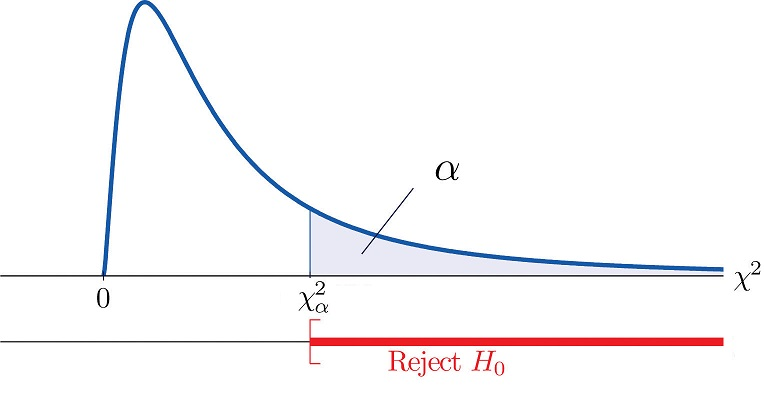

In [14]:
# Уровень значимости
alpha = 0.05
# Вывод теста
if p_value <= alpha:
	print('Отбросить H0')
else:
	print('Не смогли отбросить H0')

Отбросить H0


# <font color='blue'> 2. Проверим вычисления статистики </font>  

### 2.1 Проверим формулу для статистика $\chi^2$: $$\chi^2_c = \sum \frac{(O_i - E_i)^2}{E_i}$$

In [23]:
# Делаем numpy массивы
O = np.asarray(O)
E = np.asarray(E)

In [24]:
# Считаем статистику
print(np.divide((O-E)**2,E))

[ 5.    1.25  5.    0.    5.   11.25]


In [26]:
chi = np.sum(np.divide((O-E)**2,E))
assert np.isclose(chi, chisq_stat)
print(f"Статистика посчитана правильно: {chi}")

Статистика посчитана правильно: 27.5


### 2.2 Проверим, что p_value - квантиль найденной статистики

Функции для распределений берутся из scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

In [27]:
from scipy.stats import chi2

**Количество степень свободы** на 1 меньше числа строчек: $$dof = \text{Rows} - 1$$

Для таблицы с несколькими строчками и столбцами $$dof = (\text{Rows} - 1) (\text{Columns} - 1)$$

In [29]:
dof = 5

In [30]:
assert chi2.cdf(chisq_stat, df = dof) + p_value == 1.0
print(f"p-value совпали")

p-value совпали


# <font color='blue'> 3. Нарисуем распределение и p-value </font>  

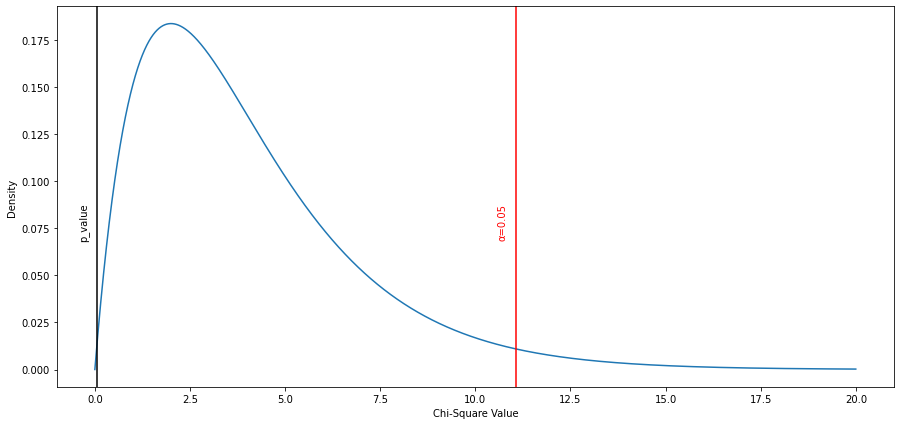

In [56]:
plt.figure(figsize=(15,7))

#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)
#plot Chi-square distribution with 4 degrees of freedom
plt.plot(x, chi2.pdf(x, df=4))

plt.axvline(x=chi2.ppf(1-alpha, df=dof), color='red')
plt.text(chi2.ppf(1-alpha, df=dof)-0.5,0.07,f'α=0.05',color='red', rotation=90)

plt.axvline(x=chi2.ppf(p_value, df=dof), color='black')
plt.text(chi2.ppf(p_value, df=dof)-0.5,0.07,f'p_value',color='black', rotation=90)

plt.xlabel('Chi-Square Value')
plt.ylabel('Density') 
plt.show()